In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
fs_df = pd.read_pickle('../data/fs_df.pkl')
cs5_df = pd.read_pickle('../data/cs5_df.pkl')
cs6_df = pd.read_pickle('../data/cs6_df.pkl')
fs_df = fs_df.drop(columns=['REQMEM','USEDMEM','NODES','CPUS'])

In [7]:
def get_delta(row):
    days, hms = row.split('-') if '-' in row else [0, row]
    hours, minutes, seconds = hms.split(':')
    return timedelta(days=int(days), seconds=int(seconds), minutes=int(minutes), hours=int(hours))
fs_df['REQTIME'] = fs_df['REQTIME'].apply(get_delta)
fs_df['USEDTIME'] = fs_df['USEDTIME'].apply(get_delta)

In [ ]:
# timedelta(seconds=fs_df['REQTIME'].dt.total_seconds().sum())

In [19]:
over_req_df = fs_df[['REQTIME','USEDTIME']]

In [21]:
over_req_df.describe()

,REQTIME,USEDTIME
count,7395234,7395234
mean,0 days 22:18:34.809081092,0 days 03:48:04.106315094
std,1 days 14:41:07.890959117,0 days 12:44:52.118592948
min,0 days 00:01:00,0 days 00:00:00
25%,0 days 01:30:00,0 days 00:02:37
50%,0 days 08:00:00,0 days 00:13:54
75%,1 days 00:00:00,0 days 01:28:10
max,41 days 16:00:00,34 days 23:15:05


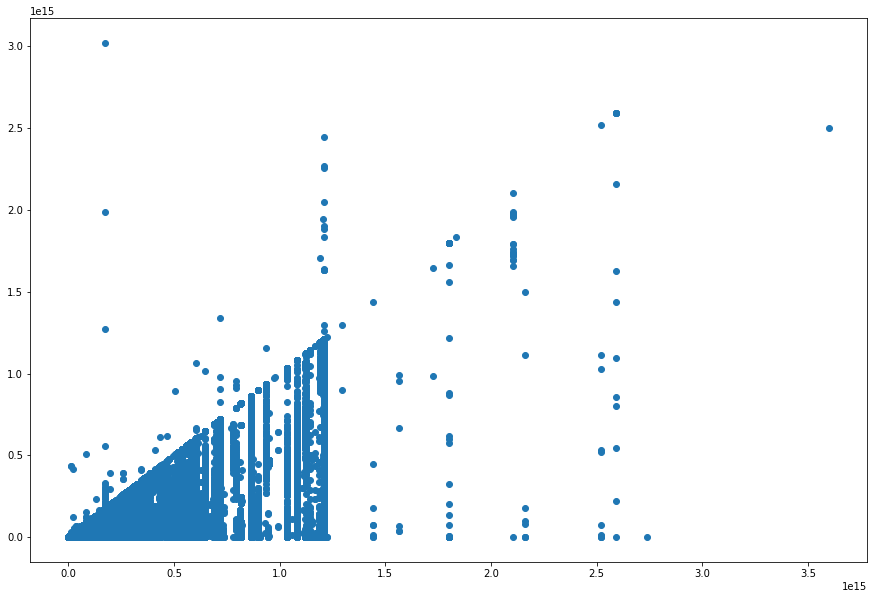

In [22]:
plt.figure(figsize=(15, 10))
plt.scatter(over_req_df['REQTIME'], over_req_df['USEDTIME'])

,REQTIME,USEDTIME
1,30 days 00:00:00,30 days 00:00:23
2,30 days 00:00:00,30 days 00:00:14
3,29 days 04:00:00,29 days 04:00:04
4,24 days 09:00:00,24 days 09:00:17
5,24 days 09:00:00,20 days 08:32:27
...,...,...
7395880,2 days 00:00:00,0 days 00:01:46
7395881,2 days 00:00:00,0 days 00:01:25
7395882,0 days 12:00:00,0 days 00:03:14
7395883,2 days 00:00:00,0 days 00:01:56
